# Ridge Regression (Régularisation L2)

In [1]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Exemple de génération de données
X = np.random.rand(100, 1) * 10  # Données explicatives
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 2  # Données cibles

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation de Ridge avec une régularisation de alpha
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Prédiction
y_pred = ridge_model.predict(X_test)

print("Prédictions :", y_pred[:5])  # Affichage des 5 premières prédictions

Prédictions : [3.67250641 3.71644666 4.98724428 4.65276157 5.1580864 ]


# Lasso Regression (Régularisation L1)

In [2]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Exemple de génération de données
X = np.random.rand(100, 1) * 10  # Données explicatives
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 2  # Données cibles

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation de Lasso avec une régularisation alpha
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Prédiction
y_pred = lasso_model.predict(X_test)

print("Prédictions :", y_pred[:5])  # Affichage des 5 premières prédictions

Prédictions : [ 6.25994311 11.47221941 15.3598366  20.61256556  3.62238761]


Choisir entre Ridge et Lasso :
- Ridge : Utilisé pour éviter le sur-ajustement tout en conservant toutes les variables. Utile si l'on souhaite que toutes les variables aient un certain poids, même faible.
- Lasso : Peut à la fois éviter le sur-ajustement et simplifier le modèle en supprimant certaines variables non pertinentes. Utile pour la sélection de variables.

Ces méthodes de régularisation aident à obtenir un modèle plus stable et général, surtout dans les cas où on dispose de nombreuses variables ou de corrélations entre elles.

# Choisir l'hyperparamètre alpha

In [3]:
from sklearn.model_selection import GridSearchCV

# Grille de valeurs pour alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Recherche par validation croisée pour Ridge
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_cv.fit(X_train, y_train)

print("Meilleure valeur pour alpha (Ridge) :", ridge_cv.best_params_)

Meilleure valeur pour alpha (Ridge) : {'alpha': 1}


# Elastic Net : Une combinaison de Ridge et Lasso

Prédictions (premières 5 valeurs) : [13.22348516  8.8527991  21.613787    1.48970696 19.9781553 ]
Mean Squared Error (MSE) : 4.804237495162159
Root Mean Squared Error (RMSE) : 2.1918570882158717
R² Score : 0.9301165416496067


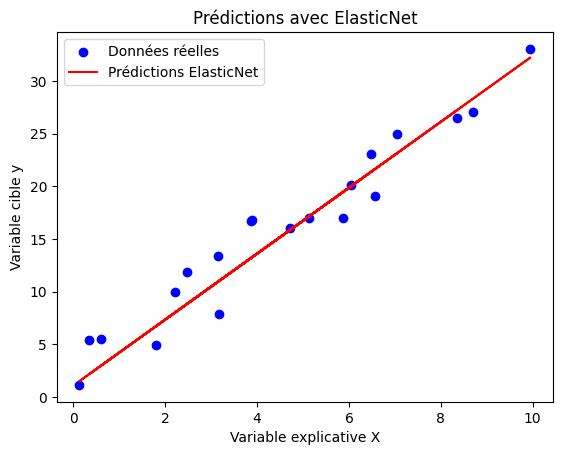

In [4]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Génération des données
X = np.random.rand(100, 1) * 10  # Données explicatives
y = 3 * X.squeeze() + 2 + np.random.randn(100) * 2  # Données cibles

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle ElasticNet avec les paramètres alpha et l1_ratio
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)

# Prédiction
y_pred = elastic_net_model.predict(X_test)

print("Prédictions (premières 5 valeurs) :", y_pred[:5])  # Affichage des 5 premières prédictions

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) :", mse)
print("Root Mean Squared Error (RMSE) :", rmse)
print("R² Score :", r2)

# Visualisation des résultats
plt.scatter(X_test, y_test, color="blue", label="Données réelles")
plt.plot(X_test, y_pred, color="red", label="Prédictions ElasticNet")
plt.xlabel("Variable explicative X")
plt.ylabel("Variable cible y")
plt.title("Prédictions avec ElasticNet")
plt.legend()
plt.show()